# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [24]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,Month,Day of the Week,Hour,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,17,3,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,17,3,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3,17,3,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3,17,3,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3,17,3,EMS


In [13]:
df.rename(columns = {'Student Name (Required)':'SN'}, inplace = True)

In [23]:
df[df['SN'] == 'AKSHAY RAJ SINGH']['Roll Num (Required)']

226    IITITS2023227
Name: Roll Num (Required), dtype: object

** Check the head of df **

In [11]:
df['Names'] = df['Student Name (Required)'].apply(lambda Student Name (Required): Student Name (Required).split(' ')[0])

SyntaxError: invalid syntax (1069933416.py, line 1)

<AxesSubplot:xlabel='Centre (Required)', ylabel='count'>

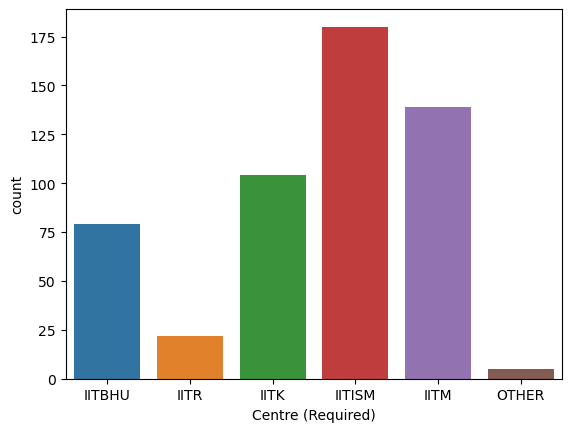

In [9]:
sns.countplot(data = df, x='Centre (Required)')

## Basic Questions

 top 5 zipcodes for 911 calls

In [8]:
df['Centre (Required)'].value_counts().head(10)

IITISM    180
IITM      139
IITK      104
IITBHU     79
IITR       22
OTHER       5
Name: Centre (Required), dtype: int64

top 5 townships (twp) for 911 calls

In [23]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [28]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 



In [41]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [42]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

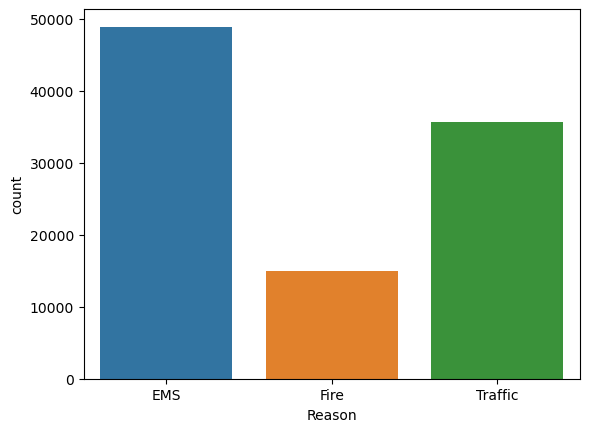

In [31]:
sns.countplot(data = df, x='Reason')

In [34]:
str

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [28]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
time = df['timeStamp'].iloc[0]

In [39]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)







<AxesSubplot:xlabel='Day of Week', ylabel='count'>

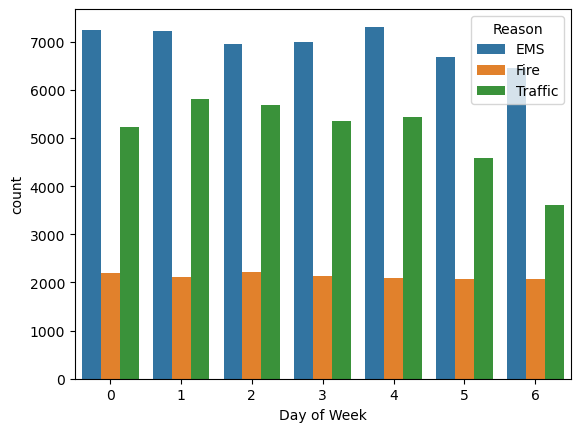

In [44]:
sns.countplot(data= df ,x = 'Day of Week', hue = 'Reason')

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

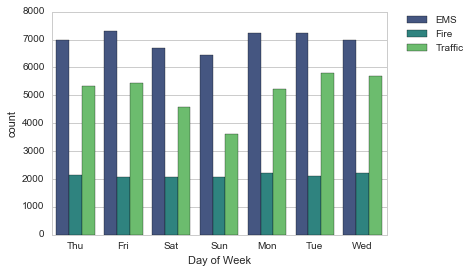

In [168]:
sns.countplot()

**Now do the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

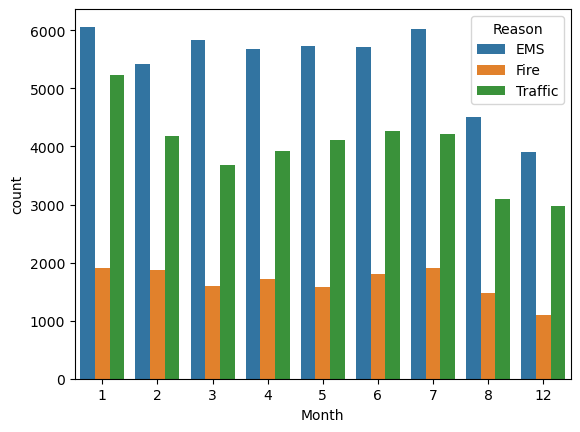

In [46]:
sns.countplot(data= df ,x = 'Month', hue = 'Reason')


It was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months

create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame

In [72]:
bymonth = df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,Day of the Week,Hour,Day of Week,Reason,Date
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

In [74]:
sns.barplot

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff260b959d0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month

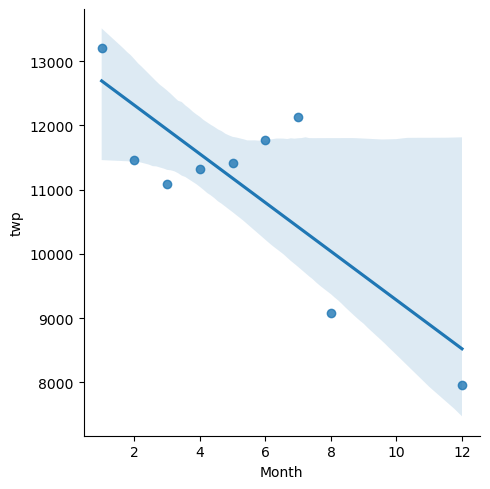

In [77]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

 apply along with the .date() method. ** 

In [62]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

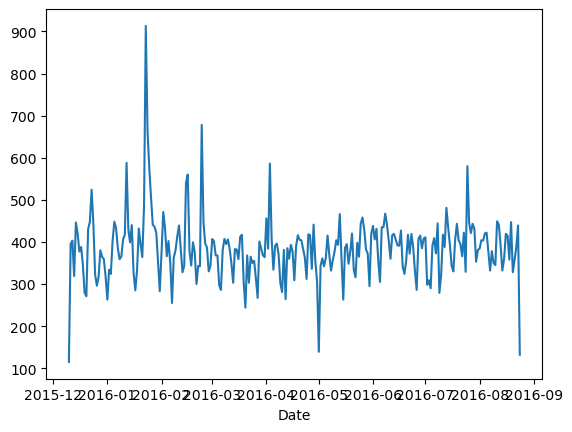

In [64]:
df.groupby('Date').count()['twp'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

NameError: name 'plt' is not defined

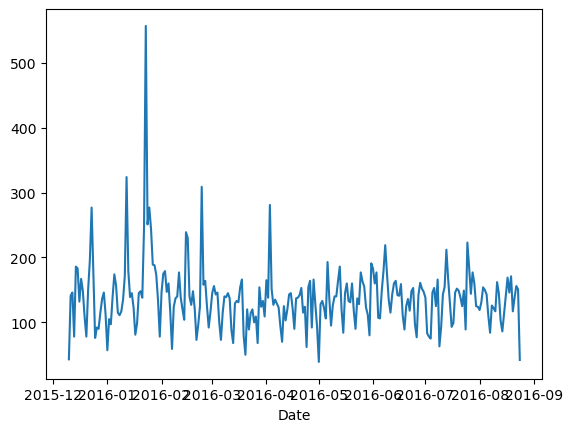

In [78]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

NameError: name 'plt' is not defined

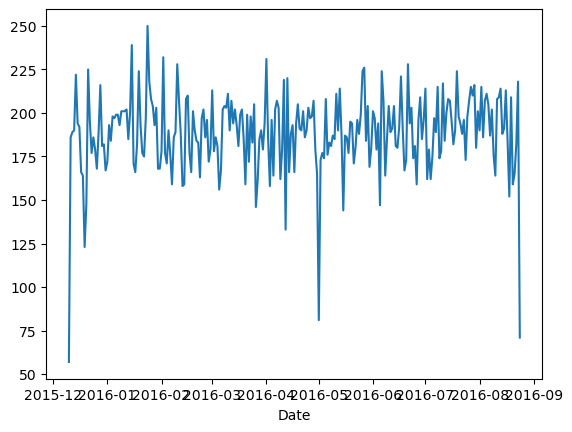

In [79]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

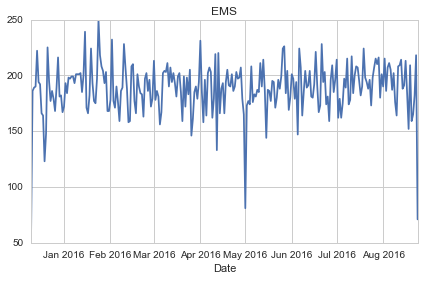

____
 

In [80]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

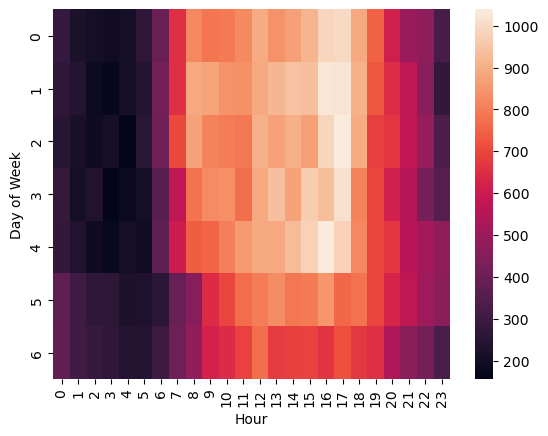

In [83]:
sns.heatmap(dayHour)

** Now create a clustermap using this DataFrame. **

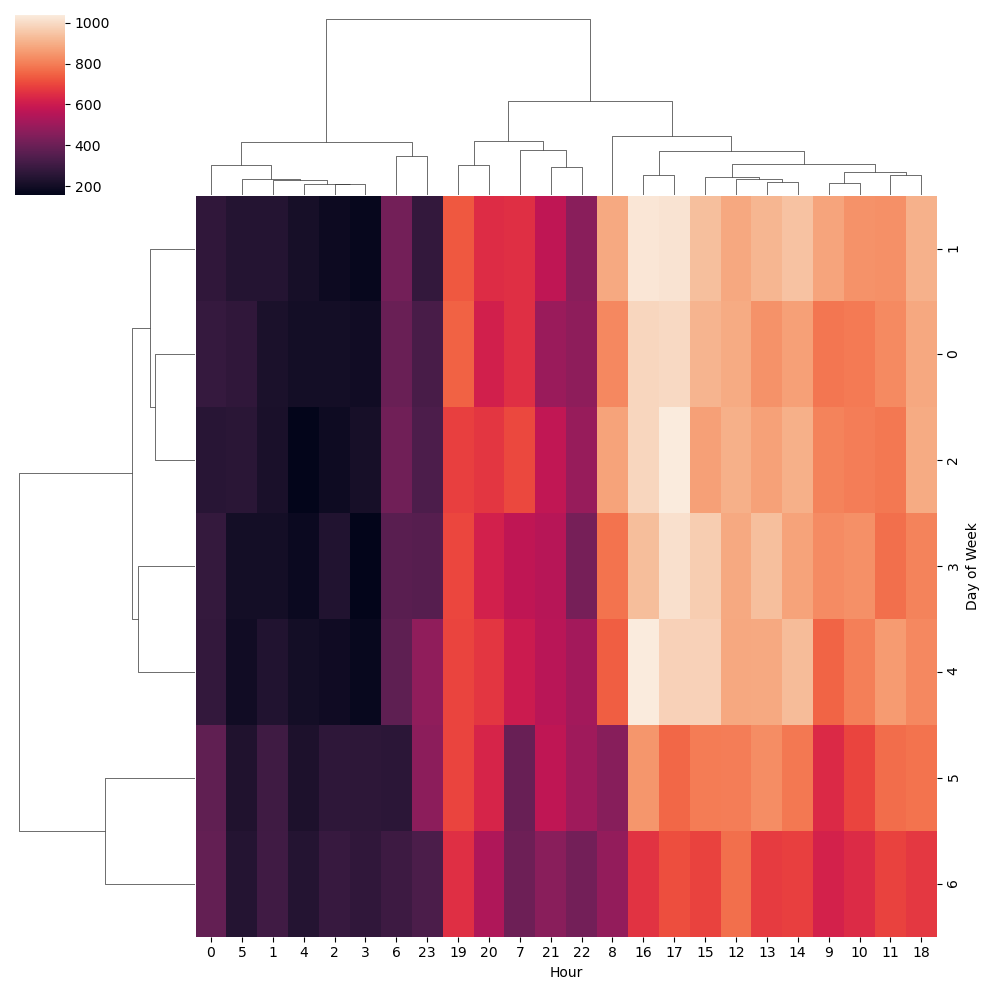

In [84]:
sns.clustermap(dayHour)

In [85]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

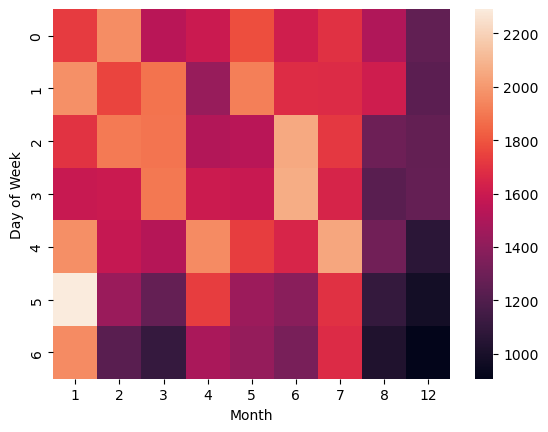

In [86]:
sns.heatmap(dayMonth)

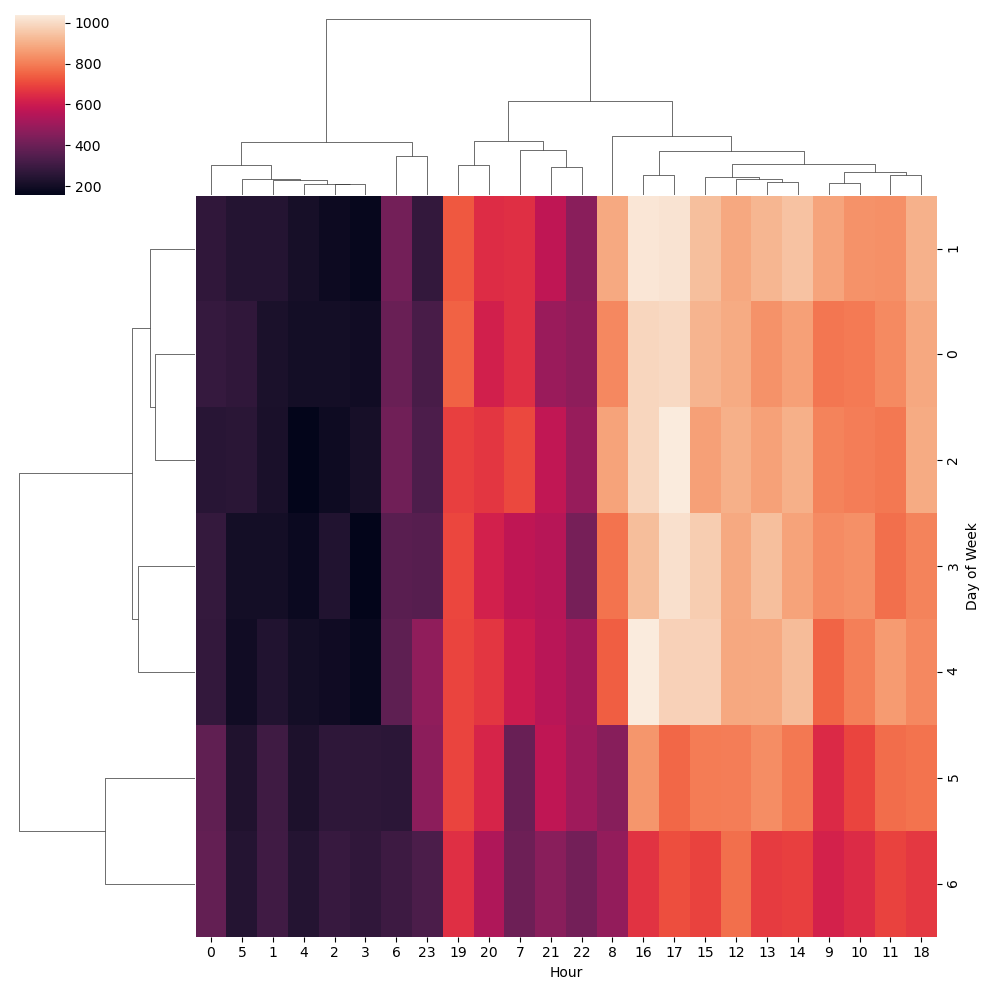

In [87]:
sns.clustermap(dayHour)


# Thank You!